# Ames Data Transformations
Investigate continuous features that will be used in MLR modeling to see which would benefit from transformations.

In [2]:
## libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Import raw data, if needed for comparison.

In [4]:
ames_raw = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0).reset_index()
ames_raw.drop(columns=['index'], inplace=True)
ames_raw.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal


# Import cleaned data: ames_clean.pkl

In [6]:
ames = pd.read_pickle('ames_clean.pkl')

In [7]:
ames.isnull().sum().sum()

0

In [8]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [9]:
ames.dtypes.value_counts()

object     48
int64      22
float64    10
Name: count, dtype: int64

In [10]:
ames.select_dtypes(include=['int64', 'float64'])

,GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,856,126000,68.0,7890,1939,1950,0.0,238.0,0.0,618.0,...,1939,2.0,399.0,0,0,0,0,166,0,0
1,1049,139500,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,...,1984,1.0,266.0,0,105,0,0,0,0,0
2,1001,124900,60.0,6060,1930,2007,0.0,737.0,0.0,100.0,...,1930,1.0,216.0,154,0,42,86,0,0,0
3,1039,114000,80.0,8146,1900,2003,0.0,0.0,0.0,405.0,...,1940,1.0,281.0,0,0,168,0,111,0,0
4,1665,227000,70.0,8400,2001,2001,0.0,643.0,0.0,167.0,...,2001,2.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,68.0,8854,1916,1950,0.0,0.0,0.0,952.0,...,1916,1.0,192.0,0,98,0,0,40,0,0
2576,1733,139600,68.0,13680,1955,1955,0.0,0.0,0.0,0.0,...,1955,2.0,452.0,0,0,0,0,0,0,0
2577,2002,145000,82.0,6270,1949,1950,0.0,284.0,0.0,717.0,...,1949,3.0,871.0,0,0,0,0,0,0,0
2578,1842,217500,68.0,8826,2000,2000,144.0,841.0,0.0,144.0,...,2000,2.0,486.0,193,96,0,0,0,0,0


In [11]:
print(len(ames.select_dtypes(include=['int64']).columns))
ames.select_dtypes(include=['int64']).columns

22


Index(['GrLivArea', 'SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

These are the continuous, numerical features to investigate for transformation

In [13]:
print(f'number of diescrete numerical features: {len(ames.select_dtypes(include=["float64"]).columns)}')
ames.select_dtypes(include=['float64']).columns

number of diescrete numerical features: 10


Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [14]:
continuous_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea',
                            'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                            'SalePrice']
print(f'number of features to consider for transformation: {len(continuous_features_list)}')

number of features to consider for transformation: 13


In [15]:
continuous_features = ames[continuous_features_list].copy()
continuous_features.head(2)

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,68.0,7890,0.0,856.0,856,399.0,0,0,0,0,166,0,126000
1,42.0,4235,149.0,1049.0,1049,266.0,0,105,0,0,0,0,139500


### Define continuous features

Do not include YearBuilt and YearRemodAdd in the features to investigate, as these will not be transformed. 

In order to address issues of multicollinerity in the linear model, **the following continuous, numerical features will be dropped** (see Linear_Modeling_Analysis.ipynb):
- MiscVal
- BsmtUnfSF
- BsmtFinSF1
- BsmtFinSF2
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF

Investigate the remaining features to see if any would benefit from transformation.

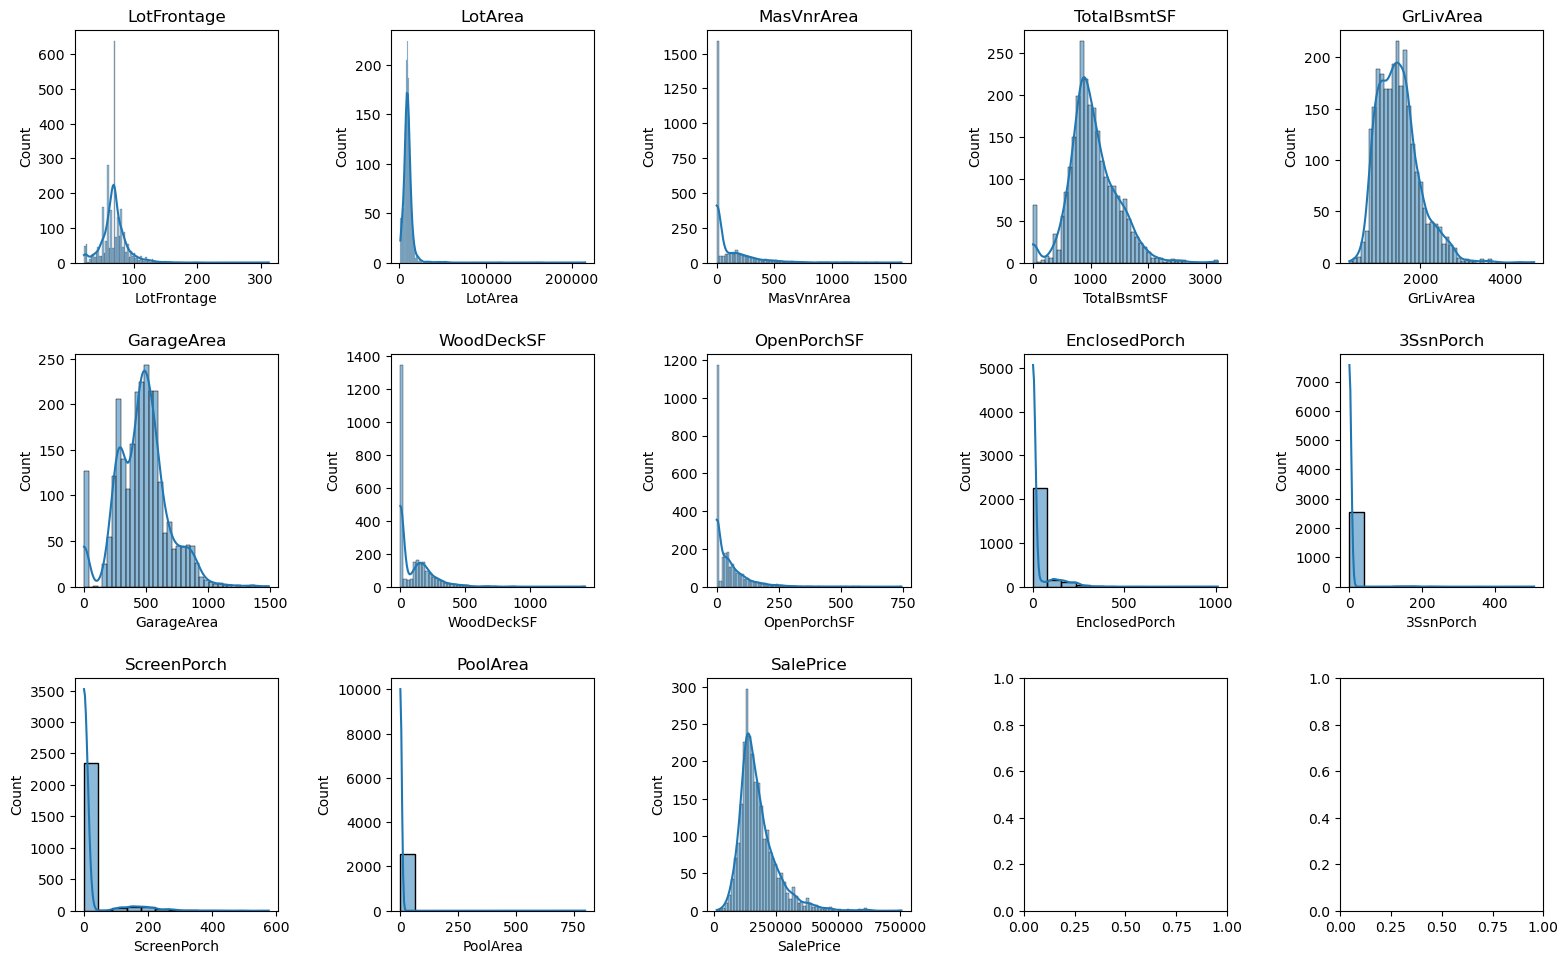

In [17]:
# Visualize feature frequency distributions for skew
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.histplot(x=continuous_features[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout(pad=2.0) 
plt.show()

GrLivArea is bimodal and it looks like GarageArea is multimodal. How does this affect analysis?
High zero counts also add a substantial 'zero' subgroup to each feature.

In [19]:
print(f'Number of feature values = 0:\n')
for feat in continuous_features:
    if (continuous_features[feat] == 0).sum() != 0:
        zero_count = (continuous_features[feat] == 0).sum()
        print(f'{feat}: {zero_count}')

Number of feature values = 0:

MasVnrArea: 1568
TotalBsmtSF: 68
GarageArea: 127
WoodDeckSF: 1335
OpenPorchSF: 1170
EnclosedPorch: 2170
3SsnPorch: 2550
ScreenPorch: 2354
PoolArea: 2571


**Note:** from cv analysis, consider log-transformations for LotArea and OpenPorchSF

In [21]:
from scipy.stats import skew


for feat in continuous_features.columns:
    
    if (continuous_features[feat] == 0).sum() != 0:
        zero_count = (continuous_features[feat] == 0).sum()
        print(f'skew for {feat} with zero count={zero_count}: {skew(continuous_features[feat])}')
    else:
        print(f'skew for {feat}: {skew(continuous_features[feat])}')

skew for LotFrontage: 1.302568343379635
skew for LotArea: 13.065940539898063
skew for MasVnrArea with zero count=1568: 2.6725624613698233
skew for TotalBsmtSF with zero count=68: 0.5151001869111463
skew for GrLivArea: 0.9794948271902554
skew for GarageArea with zero count=127: 0.2468710996207912
skew for WoodDeckSF with zero count=1335: 1.845948241998728
skew for OpenPorchSF with zero count=1170: 2.603783296639063
skew for EnclosedPorch with zero count=2170: 4.039449737987887
skew for 3SsnPorch with zero count=2550: 11.823385656120777
skew for ScreenPorch with zero count=2354: 3.988307391740699
skew for PoolArea with zero count=2571: 19.885127399260174
skew for SalePrice: 1.759777902149407


### Evaluating skew
- **skew = 0:** perfect normal distribution
- **abs(skew) < 1** is good 
- **abs(skew) between 1 and 2** is ok
- **abs(skew) > 3** is substantially non-normal

## Unimodal features
Features with no 0-value subgroup:
- LotFrontage
- LotArea
- GrLivArea
- SalePrice

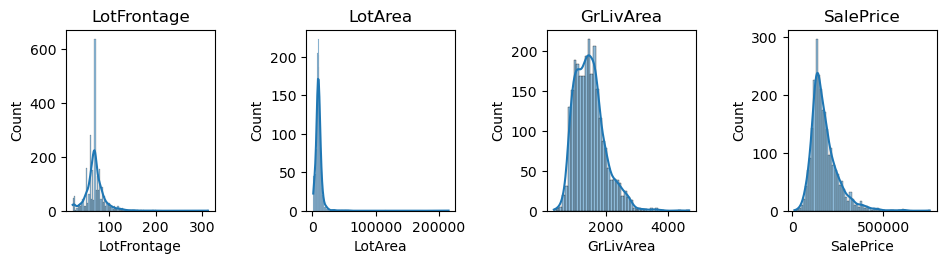

In [24]:
# Visualize feature frequency distributions for skew
fig, axes = plt.subplots(ncols=4, figsize=(10, 3))
axes = axes.flatten()

unimodal_features = ['LotFrontage', 'LotArea', 'GrLivArea', 'SalePrice']
for i, feature in enumerate(ames[unimodal_features]):
    sns.histplot(x=ames[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout(pad=2.0) 
plt.show()

1.759777902149407


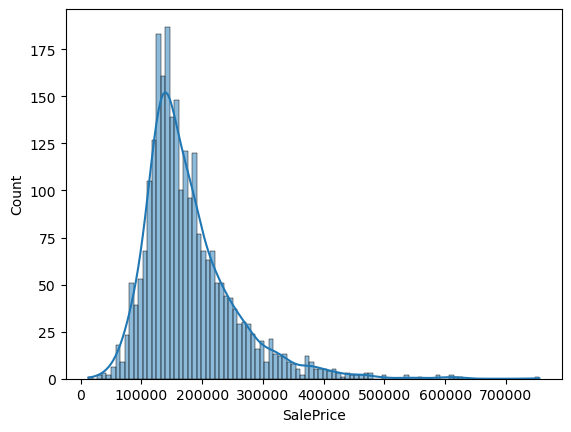

In [25]:
print(skew((continuous_features['SalePrice'])))
sns.histplot(continuous_features['SalePrice'], kde=True, bins=100);

0.041244968796023976


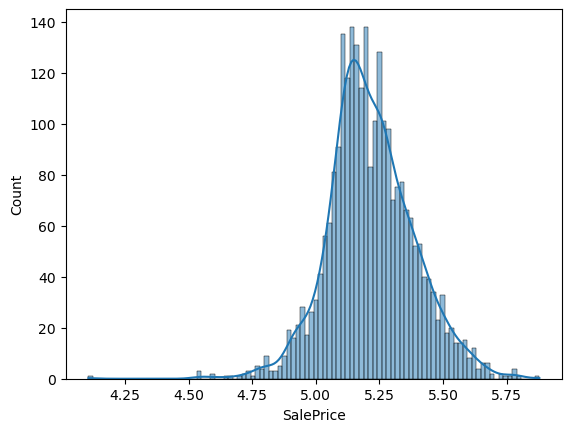

In [26]:
print(skew((np.log10(continuous_features['SalePrice']))))
sns.histplot(np.log10(continuous_features['SalePrice']), kde=True, bins=100);

### GrLivArea = 0.9
Not very skewed. No need to transform.

Does bimodality affect analysis here? 

### LotFrontage = 1.3
Slighly skewed and could be left as is.

### SalePrice = 1.8
Slighly skewed. Could be transformed, but might be ok not being transformed... ? 

Questions:
- how to evaluate how this would affect complexity of model?
- if i decide this is not skewed enough to transform (1.8) does that mean I should leave LotFrontage alone because it is less skewed? i.e. does choosing 1.8 as a threshold to not transform in the case of one variable affect transformation decisions for other variables? 

### LotArea = 13
Highly skewed. Consider transformation.

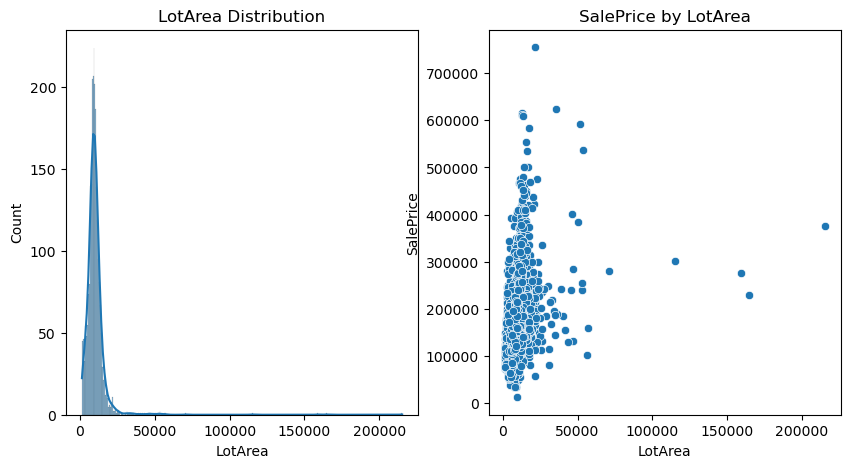

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(continuous_features['LotArea'], kde=True, ax=ax[0])
ax[0].set_title("LotArea Distribution")

sns.scatterplot(x=continuous_features['LotArea'], y=continuous_features['SalePrice'], ax=ax[1])
ax[1].set_title("SalePrice by LotArea")

#plt.tight_layout()
plt.show();

In [32]:
skew(continuous_features.LotArea)

13.065940539898063

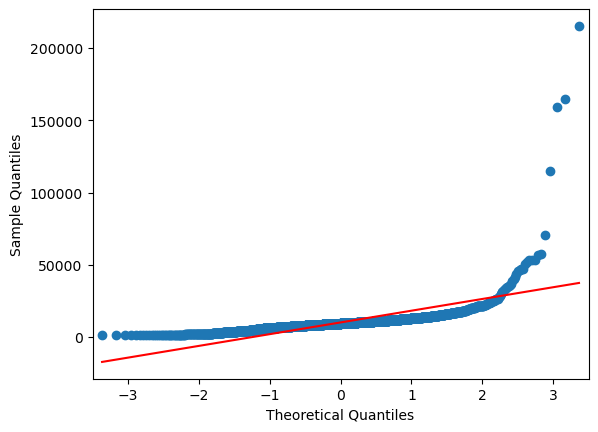

In [33]:
from statsmodels.graphics.gofplots import qqplot
qqplot(continuous_features['LotArea'], line = 's');

Compare log transformations of SalePrice and LotArea.

In [35]:
# Check for zero values for log transformations (there are no 0 values for SalePrice)
continuous_features[continuous_features['LotArea']==0]

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice


skewness for untransformed LotArea: 13.065940539898063

skewness and frequency distribution for log10(LotArea):

-0.5045360753239111


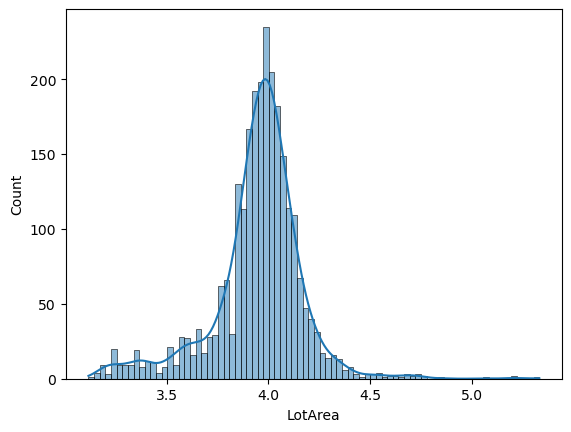

In [36]:
print(f'skewness for untransformed LotArea: {skew(continuous_features.LotArea)}')
print(f'\nskewness and frequency distribution for log10(LotArea):\n')
print(skew(np.log10(continuous_features.LotArea)))
sns.histplot(np.log10(continuous_features['LotArea']), kde=True);

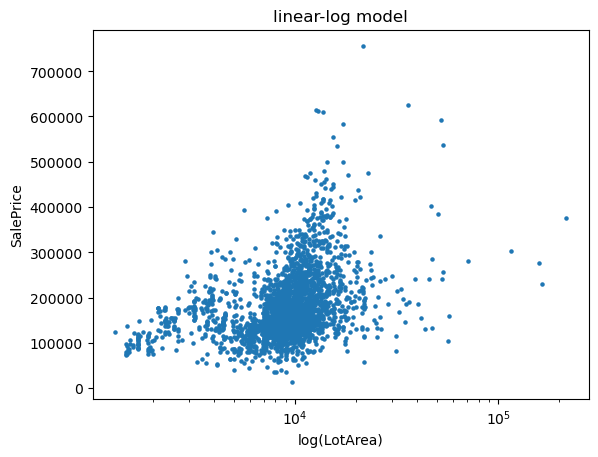

In [37]:
(continuous_features[['SalePrice','LotArea']]).plot(kind='scatter', x='LotArea', \
                                           y='SalePrice', logx=True, logy=False, s=5)
plt.title('linear-log model')
plt.xlabel('log(LotArea)')
plt.ylabel('SalePrice')
plt.show();

This is much better than the untransformed LotArea data.

**Consider log transforming LotArea**
Leave LotFrontage, GrLivArea, and SalePrice unstransformed

## Bimodal features
Features with high numbers of zero values: 

- MasVnrArea: 1568
- TotalBsmtSF: 68
- GarageArea: 127
- WoodDeckSF: 1335
- OpenPorchSF: 1170
- EnclosedPorch: 2170
- 3SsnPorch: 2550
- ScreenPorch: 2354
- PoolArea: 257

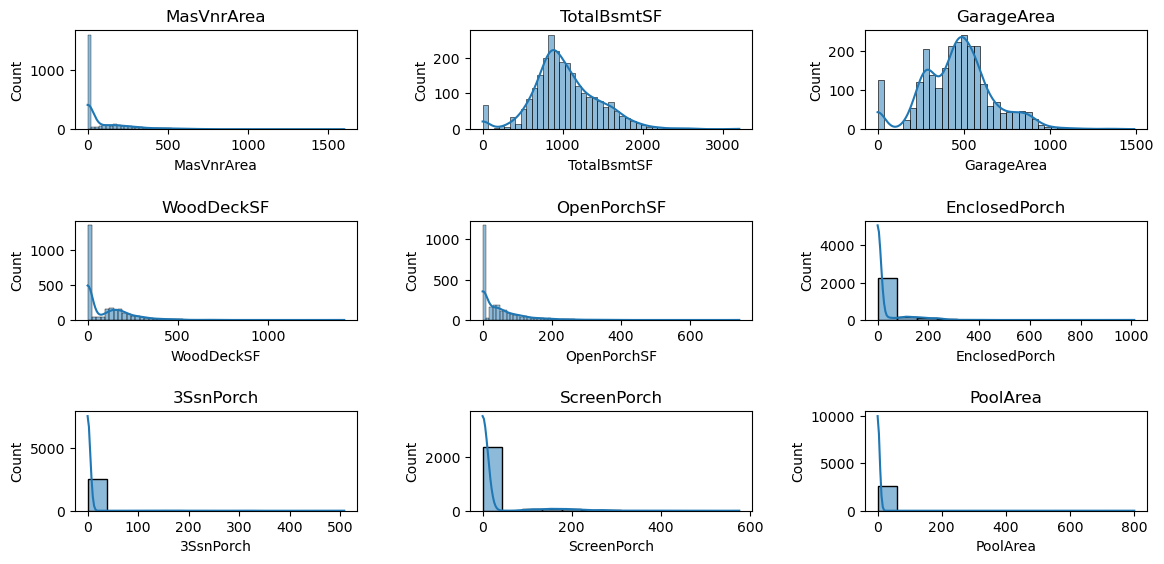

In [40]:
# Visualize feature frequency distributions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))
axes = axes.flatten()

bimodal_features = ['MasVnrArea',
                    'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

for i, feature in enumerate(ames[bimodal_features]):
    sns.histplot(x=ames[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout(pad=2.0) 
plt.show()

Each of these features has a large subgroup of values=0; i.e. many properties for which this feature does not exist. 

In [42]:
print(f'skewness for features with large number of 0 values')
for feat in continuous_features[bimodal_features]:    
        print(f'skew for {feat}: {skew(continuous_features[feat])}')

skewness for features with large number of 0 values
skew for MasVnrArea: 2.6725624613698233
skew for TotalBsmtSF: 0.5151001869111463
skew for GarageArea: 0.2468710996207912
skew for WoodDeckSF: 1.845948241998728
skew for OpenPorchSF: 2.603783296639063
skew for EnclosedPorch: 4.039449737987887
skew for 3SsnPorch: 11.823385656120777
skew for ScreenPorch: 3.988307391740699
skew for PoolArea: 19.885127399260174


Skewed features to consider:
- MasVnrArea
- OpenPorchSF
- EclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea.

If leaving SalePrice with skew = 1.8 untransformed, leave WoodDeckSF untransformed as well? 

### MasVnrArea:

skewness and pdf for untransformed MasVnrArea: 2.6725624613698233


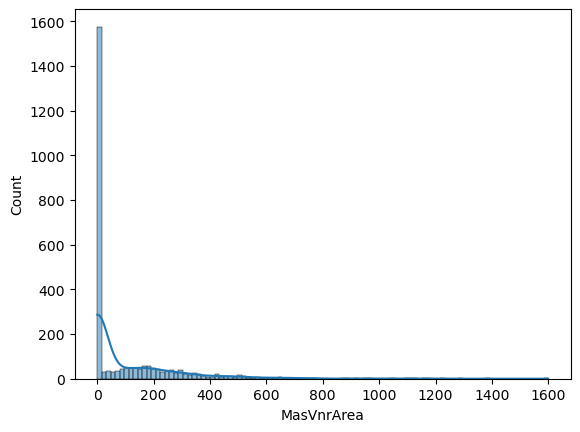

In [45]:
print(f'skewness and pdf for untransformed MasVnrArea: {skew(continuous_features.MasVnrArea)}')
sns.histplot(continuous_features['MasVnrArea'], kde=True, bins=100);

skewness and pdf for log10 MasVnrArea: 0.4589385698145445


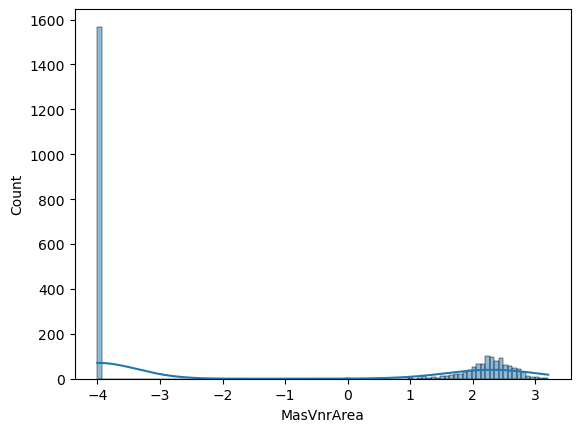

In [46]:
print(f'skewness and pdf for log10 MasVnrArea: {skew(np.log10(continuous_features.MasVnrArea + 0.0001))}')
sns.histplot(np.log10(continuous_features['MasVnrArea']+0.0001), kde=True, bins=100);

Skew is better, but this introduces a highly bimodal feature.

### Porch features:
Consider combining all the porch area features into a single feature, TotalPorch and look at how that single feature transforms. 

*See also Ames_Linear_Modeling.ipynb.*

In [49]:
# create dataframe of porch features
porch_features = ames[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].copy()

In [50]:
# add composite TotalPorch feature
porch_features['TotalPorch'] = (
    porch_features['OpenPorchSF'] + 
    porch_features['EnclosedPorch'] +
    porch_features['3SsnPorch'] + 
    porch_features['ScreenPorch']
)
porch_features.head(2)

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalPorch
0,0,0,0,166,166
1,105,0,0,0,105


In [51]:
print(f'number of observations with some porch features:')
print(len(porch_features[porch_features['TotalPorch']!=0]))
porch_features[porch_features['TotalPorch']!=0].head()

number of observations with some porch features:
1792


,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalPorch
0,0,0,0,166,166
1,105,0,0,0,105
2,0,42,86,0,128
3,0,168,0,111,279
4,45,0,0,0,45


In [52]:
print(f'number of observations with no porch features (0 values for all component features):')
print(len(porch_features[porch_features['TotalPorch']==0]))
porch_features[porch_features['TotalPorch']==0].head()

number of observations with no porch features (0 values for all component features):
788


,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalPorch
8,0,0,0,0,0
11,0,0,0,0,0
19,0,0,0,0,0
21,0,0,0,0,0
22,0,0,0,0,0


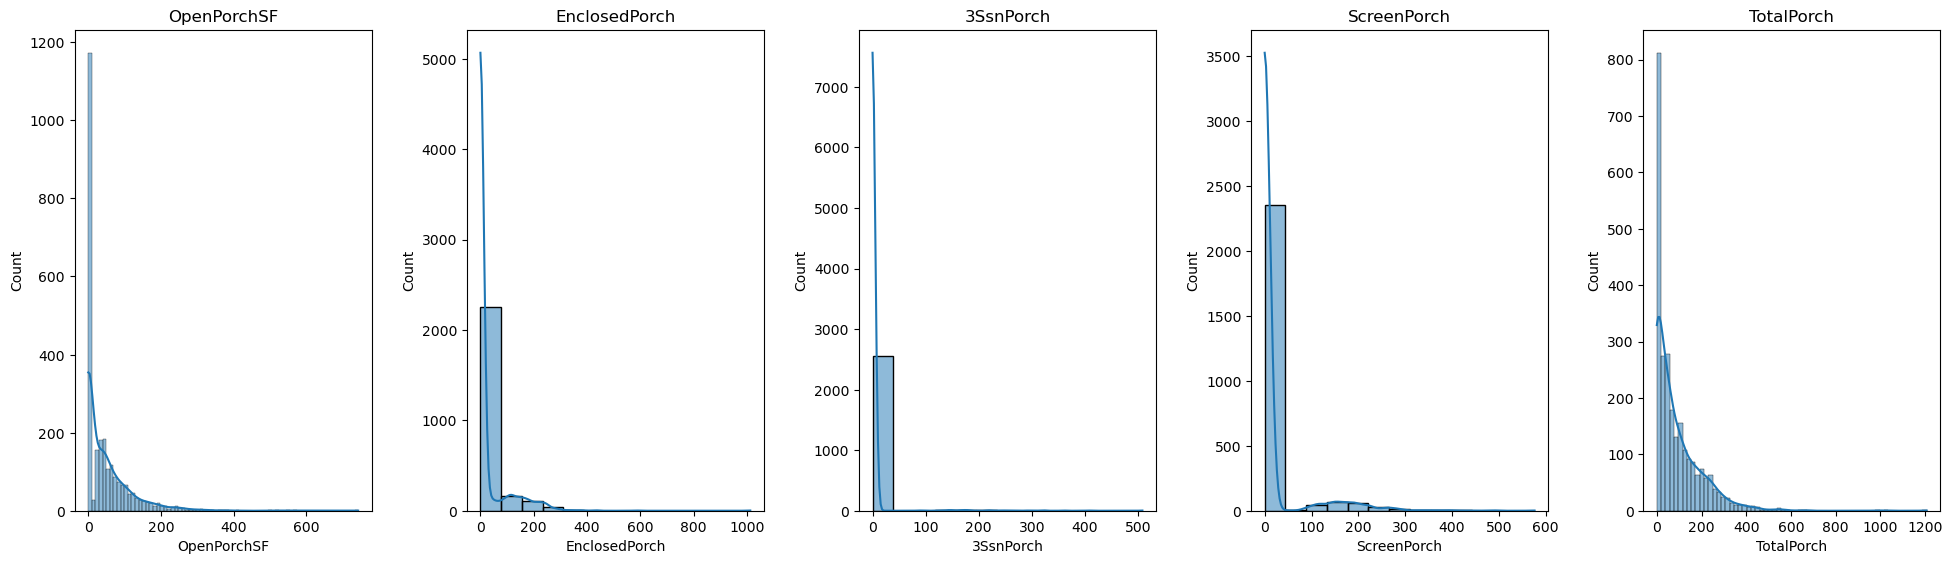

In [53]:
# porch feature frequency distributions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
axes = axes.flatten()

for i, feature in enumerate(porch_features.columns):
    sns.histplot(x=porch_features[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout(pad=2.0) 
plt.show()

In [54]:
print(f'skewness for unstransformed TotalPorch feature:')
skew(porch_features.TotalPorch)

skewness for unstransformed TotalPorch feature:


2.299698956655406

Simply combining the porch features into a single feature reduces dimensionality and replaces a few extremely skewed features with a single moderately skewed feature. This alone is an improvement.

skewness and pdf for log10(TotalPorch + 0.0001): -0.8073154521139334


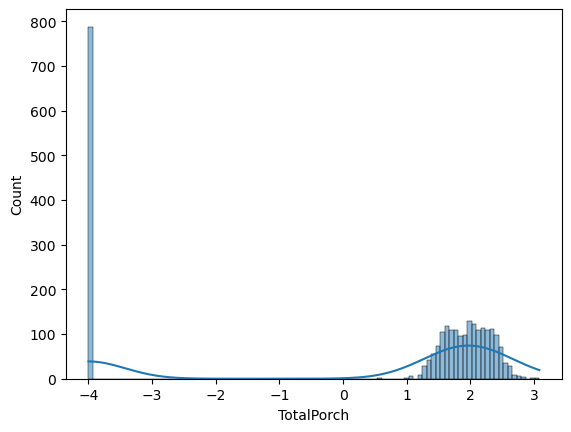

In [56]:
print(f'skewness and pdf for log10(TotalPorch + 0.0001): {skew(np.log10(porch_features.TotalPorch + 0.0001))}')
sns.histplot(np.log10(porch_features['TotalPorch']+0.0001), kde=True, bins=100);

This improves skew but creates a highly bimodal feature. What are the modeling implications for this? 

pdf for untransformed TotalPorch:


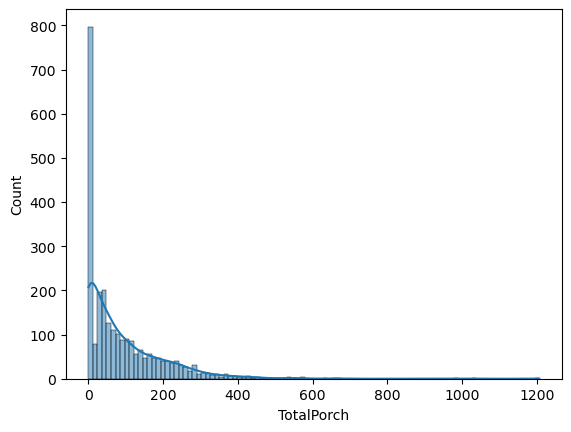

In [58]:
print(f'pdf for untransformed TotalPorch:')
sns.histplot(porch_features['TotalPorch'], kde=True, bins=100);

Could this benefit from a power transformation instead?

skewness and pdf for sqrt(TotalPorch): 0.3478096511604615


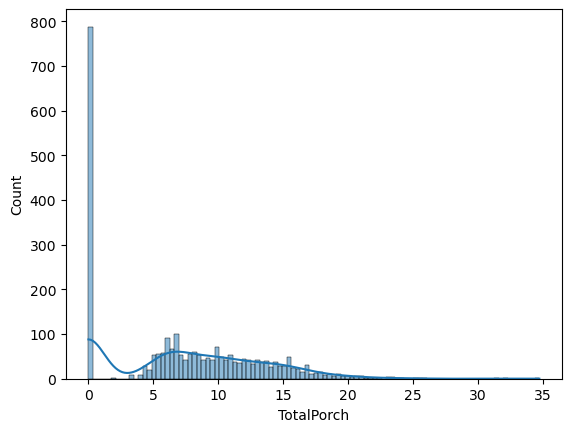

In [60]:
print(f'skewness and pdf for sqrt(TotalPorch): {skew(porch_features.TotalPorch**0.5)}')
sns.histplot(porch_features['TotalPorch']**0.5, kde=True, bins=100);

Both transformations introduce a highly bimodal feature. At a minimum:

This could help with feature reduction (simpler model) and remove several extremely skewed features in favor of a single, skewed feature.

Possibly recommend logarithmically transforming TotalPorch to improve skew, but would introduce bimodality into the feature.

- untransformed: skew = 2.3
- log transformed: skew = -0.8 (bimodal)
- sqrt transformed: skew = 0.3 (bimodal)

See Ames_Linear_Modeling.ipynb for model performance analysis.

### PoolArea:

skewness and pdf for untransformed PoolArea: 19.885127399260174


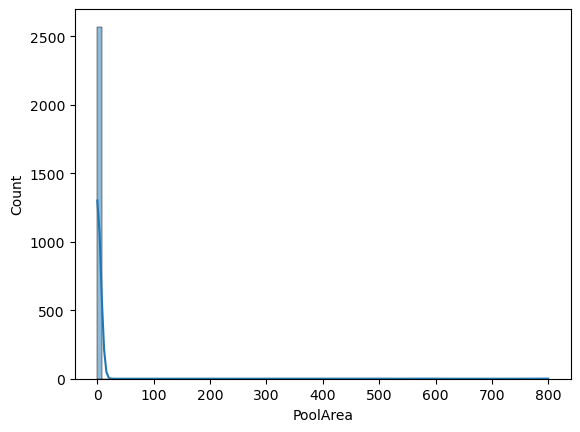

In [63]:
print(f'skewness and pdf for untransformed PoolArea: {skew(continuous_features.PoolArea)}')
sns.histplot(continuous_features['PoolArea'], kde=True, bins=100);

In [64]:
continuous_features['PoolArea'].value_counts()

PoolArea
0      2571
144       1
800       1
519       1
444       1
648       1
228       1
561       1
576       1
368       1
Name: count, dtype: int64

There are 9 non-zero PoolArea features in this dataset.

**Recommend** handling PoolArea some other way, possibly removing PoolArea and introducing a binary 'HasPool' feature. 

# Visualize final, transformed data

[Summary of data transformations recommendations](#Summary-of-data-transformations-recommendations:)

feature skew values before transformation:


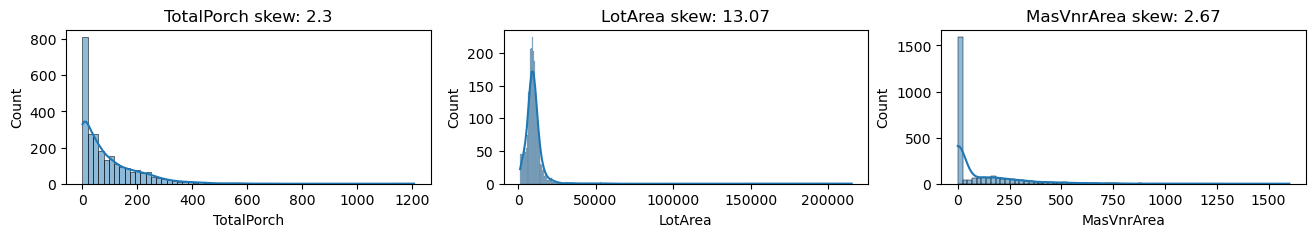

In [67]:
# Visualize final feature data for model:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 2))
axes = axes.flatten()

# features before transformation
sns.histplot(x=porch_features['TotalPorch'], kde=True, ax=axes[0])
axes[0].set_title(f'TotalPorch skew: {round(skew(porch_features["TotalPorch"]), 2)}')
sns.histplot(x=continuous_features['LotArea'], kde=True, ax=axes[1])
axes[1].set_title(f'LotArea skew: {round(skew(continuous_features["LotArea"]), 2)}')
sns.histplot(x=continuous_features['MasVnrArea'], kde=True, ax=axes[2])
axes[2].set_title(f'MasVnrArea skew: {round(skew(continuous_features["MasVnrArea"]), 2)}')
print('feature skew values before transformation:');

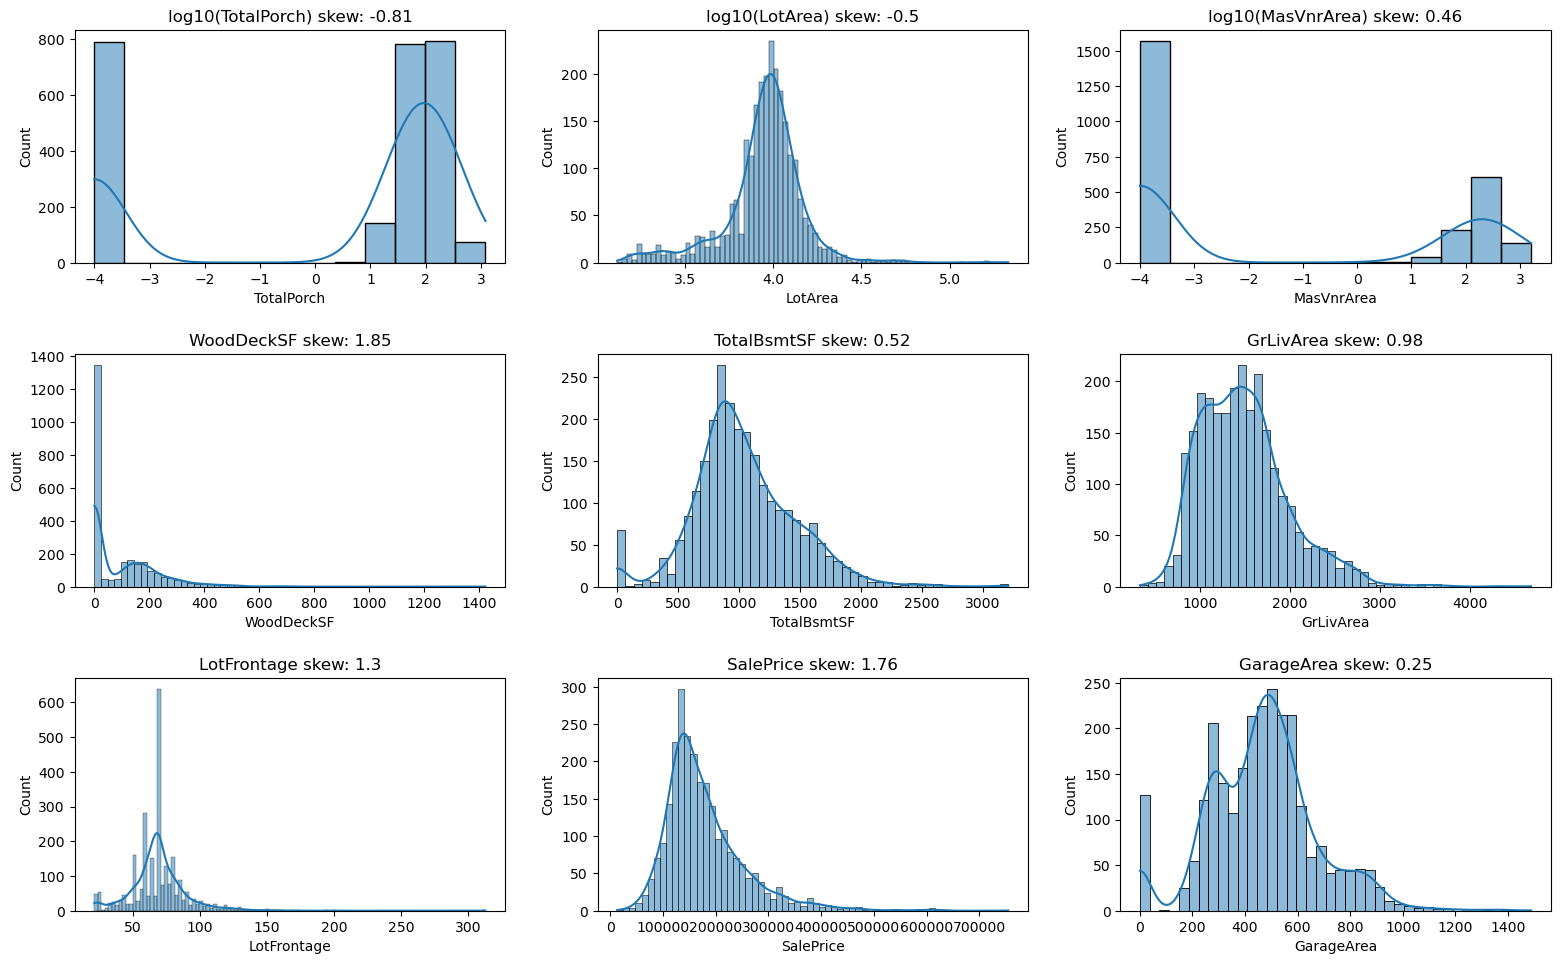

In [68]:
# Visualize final feature data for model:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 10))
axes = axes.flatten()

# transformed features
sns.histplot(x=np.log10(porch_features['TotalPorch']+.0001), kde=True, ax=axes[0])
axes[0].set_title(f'log10(TotalPorch) skew: {round(skew(np.log10(porch_features["TotalPorch"]+0.0001)), 2)}')
sns.histplot(x=np.log10(continuous_features['LotArea']+.0001), kde=True, ax=axes[1])
axes[1].set_title(f'log10(LotArea) skew: {round(skew(np.log10(continuous_features["LotArea"]+0.0001)), 2)}')
sns.histplot(x=np.log10(continuous_features['MasVnrArea']+.0001), kde=True, ax=axes[2])
axes[2].set_title(f'log10(MasVnrArea) skew: {round(skew(np.log10(continuous_features["MasVnrArea"]+0.0001)), 2)}')

# untransformed features
sns.histplot(x=continuous_features['WoodDeckSF'], kde=True, ax=axes[3])
axes[3].set_title(f'WoodDeckSF skew: {round(skew(continuous_features["WoodDeckSF"]), 2)}')
sns.histplot(x=continuous_features['TotalBsmtSF'], kde=True, ax=axes[4])
axes[4].set_title(f'TotalBsmtSF skew: {round(skew(continuous_features["TotalBsmtSF"]), 2)}')
sns.histplot(x=continuous_features['GrLivArea'], kde=True, ax=axes[5])
axes[5].set_title(f'GrLivArea skew: {round(skew(continuous_features["GrLivArea"]), 2)}')
sns.histplot(x=continuous_features['LotFrontage'], kde=True, ax=axes[6])
axes[6].set_title(f'LotFrontage skew: {round(skew(continuous_features["LotFrontage"]), 2)}')
sns.histplot(x=continuous_features['SalePrice'], kde=True, ax=axes[7])
axes[7].set_title(f'SalePrice skew: {round(skew(continuous_features["SalePrice"]), 2)}')
sns.histplot(x=continuous_features['GarageArea'], kde=True, ax=axes[8])
axes[8].set_title(f'GarageArea skew: {round(skew(continuous_features["GarageArea"]), 2)}')
#print('feature skew values after transformation:')

plt.tight_layout(pad=2.0) 
plt.show();

# Log SalePrice
[Contents](#Contents)

After using sequential feature selector, investigate whether log transforming SalePrice has an appreciable affect. 

In [70]:
ames.head(2)

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,126000,30,RL,68.0,7890,Pave,None,Reg,Lvl,...,166,0,None,None,None,0,3,2010,WD,Normal
1,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,2,2009,WD,Normal


### Select features with SequentialFeatureSelector

In [72]:
# # dropping composite, multicollinear features
# X_sfs = ames.select_dtypes(include=["int64", "float64"])
# X_sfs = X_sfs.drop(columns=['SalePrice', 'GrLivArea', 'TotalBsmtSF'], axis=1)
# y = ames['SalePrice']

In [73]:
# dropping component, multicollinear features
X_sfs = ames.select_dtypes(include=["int64", "float64"])
X_sfs = X_sfs.drop(columns=['SalePrice', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)
y = ames['SalePrice']

In [74]:
# # full model, including multicollinear features
# X_sfs = ames.select_dtypes(include=["int64", "float64"])
# X_sfs = X_sfs.drop('SalePrice', axis=1)
# y = ames['SalePrice']

In [75]:
X_sfs.head(2)

,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,856,68.0,7890,1939,1950,0.0,856.0,1.0,0.0,1,...,1939,2.0,399.0,0,0,0,0,166,0,0
1,1049,42.0,4235,1984,1984,149.0,1049.0,1.0,0.0,2,...,1984,1.0,266.0,0,105,0,0,0,0,0


In [76]:
X_sfs.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

#### Examine top OLS scores for features against SalePrice

In [78]:
model = LinearRegression()

# collect feature scores
feature_scores = {}

# Evaluate each feature with cross-validation
for feature in X_sfs.columns:
    X_single = X_sfs[[feature]]
    cv_scores = cross_val_score(model, X_single, y)
    feature_scores[feature] = cv_scores.mean()

# Identify the top features based on mean CV R² scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_features = sorted_features[0:10]

# Display the top features and their individual performance
for feature, score in top_features:
    print(f"Feature: {feature}, Mean CV R²: {score:.4f}")

Feature: GrLivArea, Mean CV R²: 0.5128
Feature: TotalBsmtSF, Mean CV R²: 0.4058
Feature: GarageCars, Mean CV R²: 0.3966
Feature: GarageArea, Mean CV R²: 0.3938
Feature: YearBuilt, Mean CV R²: 0.2848
Feature: FullBath, Mean CV R²: 0.2787
Feature: GarageYrBlt, Mean CV R²: 0.2731
Feature: YearRemodAdd, Mean CV R²: 0.2506
Feature: MasVnrArea, Mean CV R²: 0.2282
Feature: TotRmsAbvGrd, Mean CV R²: 0.2275


In [79]:
feature_scores

{'GrLivArea': 0.5127913332712819,
 'LotFrontage': 0.10322542060608728,
 'LotArea': 0.055424358701118524,
 'YearBuilt': 0.2847877008788742,
 'YearRemodAdd': 0.2506157669549806,
 'MasVnrArea': 0.22817732405829944,
 'TotalBsmtSF': 0.40582578714925105,
 'BsmtFullBath': 0.06972475317410139,
 'BsmtHalfBath': -0.008696509411066432,
 'FullBath': 0.27873098811308633,
 'HalfBath': 0.07364358995343825,
 'BedroomAbvGr': 0.01304100621735298,
 'KitchenAbvGr': 0.004213885342150591,
 'TotRmsAbvGrd': 0.22746051347041965,
 'Fireplaces': 0.22729195076149816,
 'GarageYrBlt': 0.2730934800275725,
 'GarageCars': 0.39655794303088143,
 'GarageArea': 0.3938122413174133,
 'WoodDeckSF': 0.09826698205811273,
 'OpenPorchSF': 0.08794410101854326,
 'EnclosedPorch': 0.0016971466666367396,
 '3SsnPorch': -0.009185980801307591,
 'ScreenPorch': 0.004664055639631903,
 'PoolArea': -0.00976934035505339,
 'MiscVal': -0.009499157120176172}

In [80]:
# Extract top features for multiple linear regression
top_feats = [feature for feature, score in top_features]

# Build the model with the top features
X_top = ames[top_feats]

# Evaluate the model with cross-validation
cv_scores_mlr = cross_val_score(model, X_top, y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()

print(f'mean cv R2 score for multiple linear regression model: {mean_mlr_score:.4f}')

mean cv R2 score for multiple linear regression model: 0.7893


Selecting 10 features for full model, dropping ONLY SalePrice: 0.7877
Selecting 10 features for model without composite features (TotalBsmtSF and GrLivArea): 0.7376
Selecting 10 features for model without 6 component features: 0.7893

In [82]:
# Perform Sequential Feature Selector with n=5 and build on above code
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X_sfs, y)

selected_features = X_sfs.columns[sfs.get_support()].to_list()
print(f'features selected by SFS: {selected_features}')

scores = cross_val_score(model, ames[selected_features], y)
print(f'fean cv R2 score using SFS with n=5: {scores.mean():.4f}')

features selected by SFS: ['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr', 'GarageArea']
fean cv R2 score using SFS with n=5: 0.7821


**Vinod's model:**

- Features selected by SFS: 'GrLivArea', 'OverallQual', 'YearBuilt', '1stFlrSF', 'KitchenAbvGr'
- Mean CV R² Score using SFS with n=5: 0.8055

**Note:** Among some other differences, Vinod's model classifies OverallQual and OverallCond as numeric features. Mine does not. Those are important features that may well be contributing to his  model score of 0.8002 for n=5.

**An interesting question to investigate would be how classifying OverallCond and OverallQual, as either numeric or categorical datatypes, impacts the model.**

## **Suggest dropping 6 component features to handle multicollinearity.**

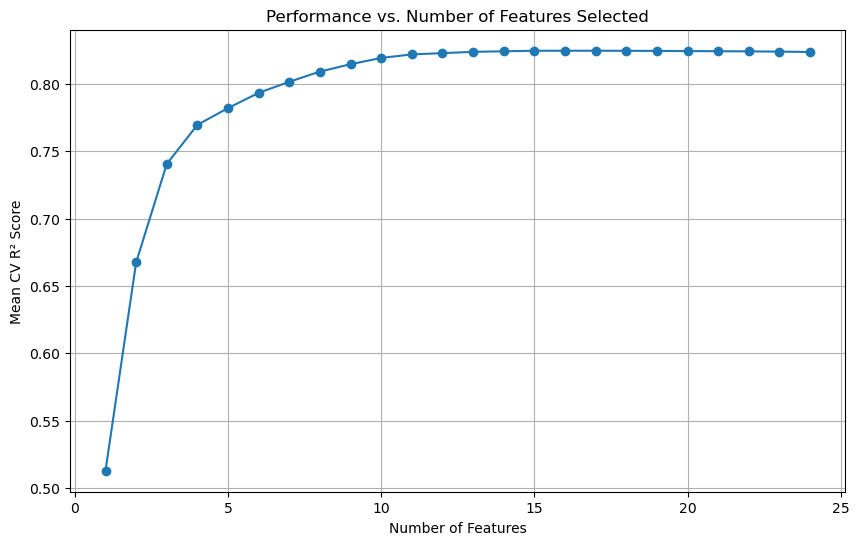

In [85]:
# Performance of SFS from 1 feature to maximum, building on code above:
import matplotlib.pyplot as plt

# Prepare to store the mean CV R² scores for each number of features
mean_scores = []

# Iterate over a range from 1 feature to the maximum number of features available
for n_features_to_select in range(1, len(X_sfs.columns)):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X_sfs, y)
    selected_features = X_sfs.columns[sfs.get_support()]
    score = cross_val_score(model, X_sfs[selected_features], y, cv=5, scoring="r2").mean()
    mean_scores.append(score)

# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_sfs.columns)), mean_scores, marker="o")
plt.title("Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

Set the tolerance rate. If the model can't keep improving, go ahead and stop.

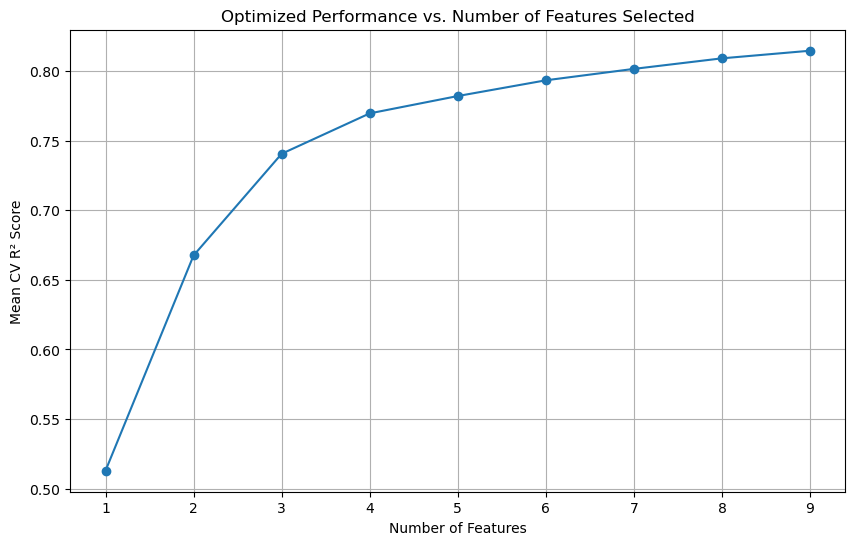

In [87]:
# Apply Sequential Feature Selector with tolerance = 0.005, building on code above
sfs_tol = SequentialFeatureSelector(model, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X_sfs, y)

# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())

# Prepare to store the mean CV R² scores for each number of features
mean_scores_tol = []

# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X_sfs, y)
    selected_features = X_sfs.columns[sfs.get_support()]
    score = cross_val_score(model, X_sfs[selected_features], y, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)

# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol, marker="o")
plt.title("Optimized Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

The model stops improving after 9 features.

In [89]:
# Print the selected features and their performance, building on the above: 
selected_features = X_sfs.columns[sfs_tol.get_support()]
print(f"Number of features selected: {n_features_selected}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Mean CV R² Score using SFS with tol=0.005: {mean_scores_tol[-1]:.4f}")

Number of features selected: 9
Selected features: ['GrLivArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea']
Mean CV R² Score using SFS with tol=0.005: 0.8147


**Vinod's model:**
- Number of features selected: 8
- Selected features: 'GrLivArea', **'LotArea', 'OverallQual', 'OverallCond',** 'YearBuilt', **'1stFlrSF'**, 'BedroomAbvGr', 'KitchenAbvGr'
- Mean CV R² Score using SFS with tol=0.005: 0.8238

In [91]:
score = cross_val_score(model, X_sfs[selected_features], y, cv=5, scoring="r2").mean()
print(f'R2 score for model with {n_features_selected} numeric features (chosen with SequentialFeatureSelector)\nregressed against SalePrice:')
round(score, 4)

R2 score for model with 9 numeric features (chosen with SequentialFeatureSelector)
regressed against SalePrice:


0.8147

### Examining performance against log(SalePrice):

In [93]:
y

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2575    121000
2576    139600
2577    145000
2578    217500
2579    215000
Name: SalePrice, Length: 2580, dtype: int64

In [94]:
import numpy as np
log_price = np.log10(y)
log_price

0       5.100371
1       5.144574
2       5.096562
3       5.056905
4       5.356026
          ...   
2575    5.082785
2576    5.144885
2577    5.161368
2578    5.337459
2579    5.332438
Name: SalePrice, Length: 2580, dtype: float64

In [95]:
log_score = cross_val_score(model, X_sfs[selected_features], log_price, cv=5, scoring="r2").mean()
round(log_score, 4)

0.8353

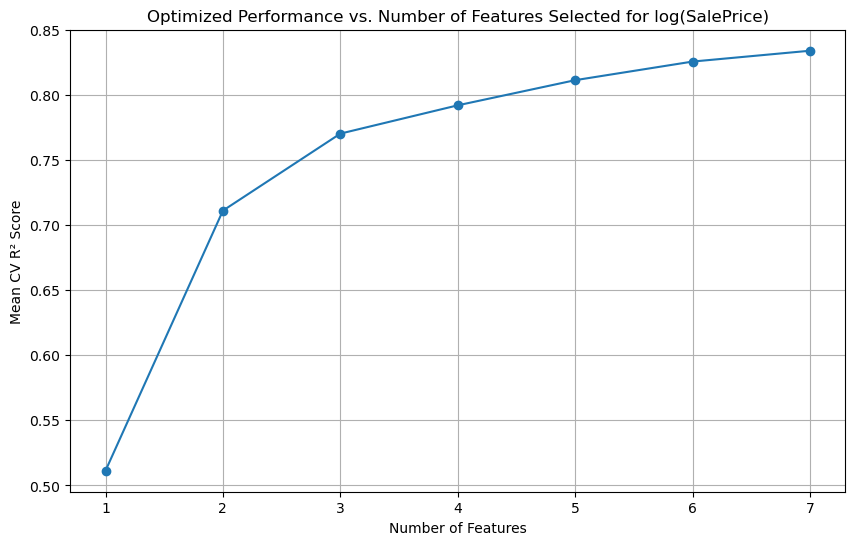

In [96]:
# Apply Sequential Feature Selector with tolerance = 0.005, for log(SalePrice)
model = LinearRegression()
sfs_tol = SequentialFeatureSelector(model, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X_sfs, log_price)

# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())

# Prepare to store the mean CV R² scores for each number of features
mean_scores_tol = []

# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select)
    sfs.fit(X_sfs, log_price)
    selected_features = X_sfs.columns[sfs.get_support()]
    score = cross_val_score(model, X_sfs[selected_features], log_price, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)

# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol, marker="o")
plt.title("Optimized Performance vs. Number of Features Selected for log(SalePrice)")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

In [97]:
# Print the selected features and their performance, building on the above: 
selected_features = X_sfs.columns[sfs_tol.get_support()]
print(f"Number of features selected for log(SalePrice): {n_features_selected}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Mean CV R² Score using SFS with tol=0.005: {mean_scores_tol[-1]:.4f}")

Number of features selected for log(SalePrice): 7
Selected features: ['GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'KitchenAbvGr', 'Fireplaces', 'GarageArea']
Mean CV R² Score using SFS with tol=0.005: 0.8343


In [98]:
print(f'R2 score for model with {n_features_selected} numeric features (chosen with SequentialFeatureSelector)\nregressed against log(SalePrice):')
log_score = cross_val_score(model, X_sfs[selected_features], log_price, cv=5, scoring="r2").mean()
round(log_score, 4)

R2 score for model with 7 numeric features (chosen with SequentialFeatureSelector)
regressed against log(SalePrice):


0.8343

**Summary:**

- R2 score for model with **9** numeric features (chosen with SequentialFeatureSelector)
regressed against **SalePrice**: **0.8147**

- R2 score for model with **7** numeric features (chosen with SequentialFeatureSelector)
regressed against **log(SalePrice)**: **0.8343**

The less complex numerical model regressed against log(SalePrice) is an improvement. 

Consider the following subset of 7 sfs-reduced features against log(SalePrice):
'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'KitchenAbvGr', 'Fireplaces', 'GarageArea'

# Extra stuff

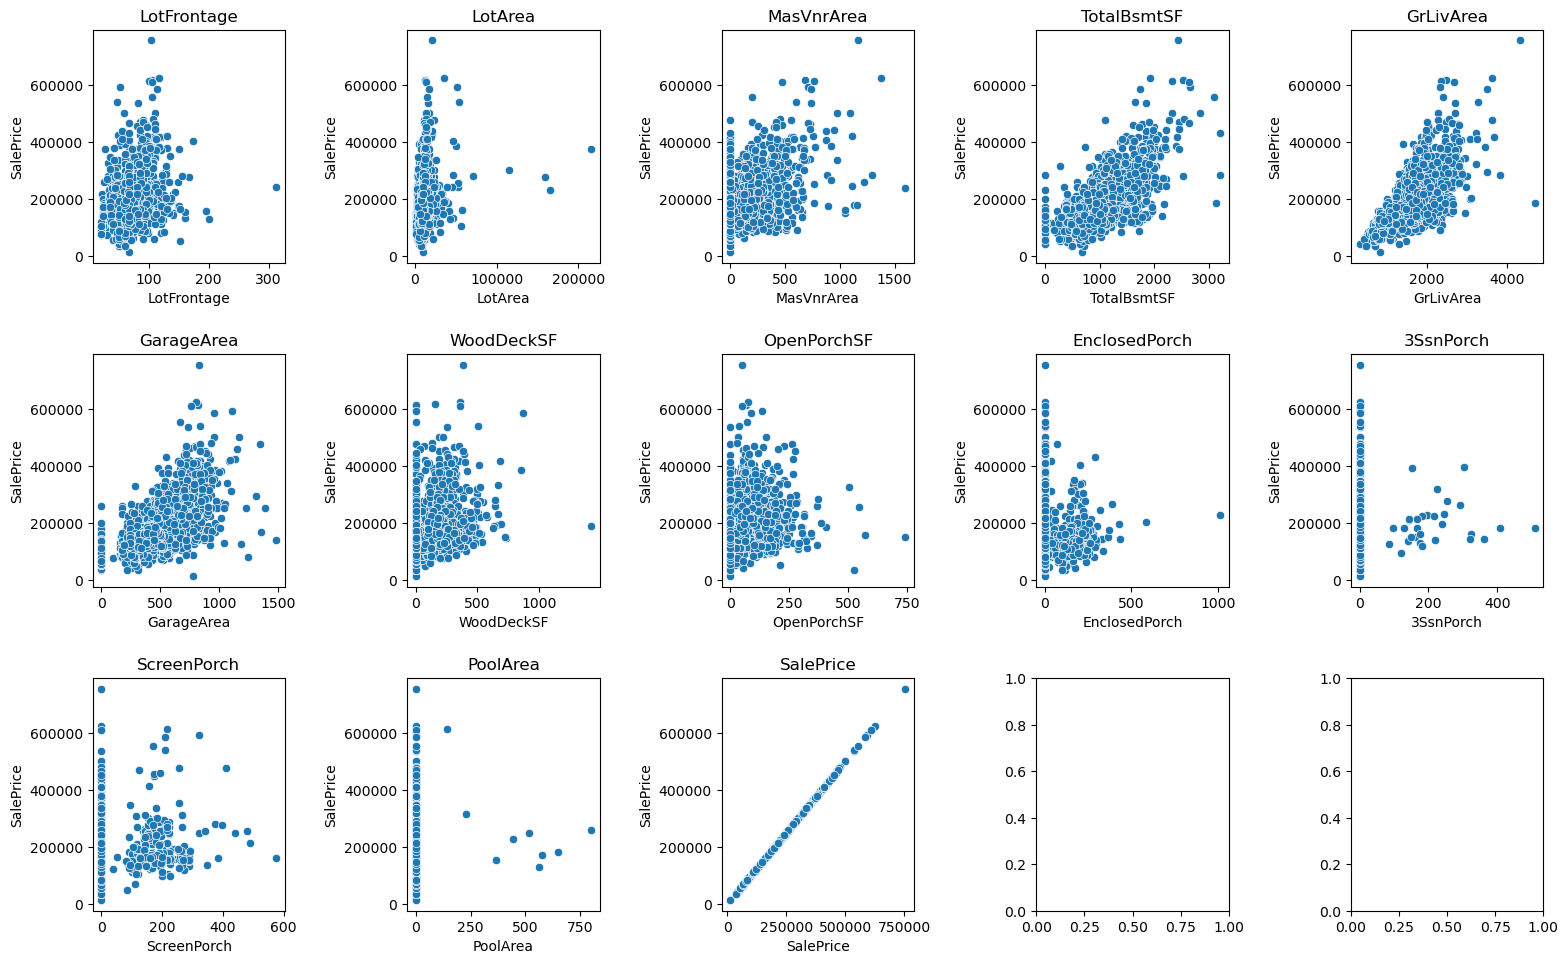

In [101]:
# Visualize relationships between features and SalePrice
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.scatterplot(x=continuous_features[feature], y=continuous_features['SalePrice'], ax=axes[i])
    axes[i].set_title(f'{feature}')

plt.tight_layout(pad=2.0) 
plt.show()